In [97]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

Ну наша задача попробовать применить `KNN` к титанику, чтож, видимо будем классифицировать)

Быстренько загрузим данные, сделаем тоже самое что и в прошло ноутбуке

In [98]:
data = pd.read_csv('../04_Forests/HW/data/train.csv')

In [99]:
def preprocess(df: pd.DataFrame()) -> pd.DataFrame():
    out = df.copy()
    out.drop(columns=['PassengerId', 'Name', 'Ticket', 'Cabin'], inplace=True)
    
    cleanup_sex = {"Sex": {"male": 1, "female": 0}}
    out.replace(cleanup_sex, inplace=True)
    
    out = pd.get_dummies(out, columns=["Embarked"])
    
    out['Age'].fillna((out['Age'].mean()), inplace=True)
    return out

In [100]:
data_1 = preprocess(data)

In [101]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import precision_recall_fscore_support

In [102]:
x = data_1.drop(columns=['Survived'])
y = data_1['Survived']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

sc = StandardScaler()
sc.fit(x_train)
x_test = sc.transform(x_test)
x_test = sc.transform(x_test)

Ну всё, теперь можно подбирать параметры для `KNN`

In [103]:
from sklearn.neighbors import KNeighborsClassifier
neigh_clf = KNeighborsClassifier(n_neighbors=3, weights='uniform')
neigh_clf.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [104]:
neigh_clf.predict(x_train.values[1:5])

array([0, 0, 0, 0], dtype=int64)

In [105]:
y_test_hat = neigh_clf.predict(x_test)
y_train_hat = neigh_clf.predict(x_train)

In [106]:
y_test.shape, x_test.shape

((179,), (179, 9))

In [107]:
pr, rec, f1, _ = precision_recall_fscore_support(y_test, y_test_hat, average='binary')
print(f'Test\n\tprecision={pr:.2f}\n\trecall   ={rec:.2f}\n\tf1       ={f1:.2f}')
pr, rec, f1, _ = precision_recall_fscore_support(y_train, y_train_hat, average='binary')
print(f'Train\n\tprecision={pr:.2f}\n\trecall   ={rec:.2f}\n\tf1       ={f1:.2f}')

Test
	precision=0.41
	recall   =1.00
	f1       =0.58
Train
	precision=0.81
	recall   =0.73
	f1       =0.76


На `train` качество чуть хуже чем у леса, но ок. А вот тест прям не очень.

In [108]:
from sklearn.metrics import f1_score, make_scorer
from sklearn.model_selection import cross_validate

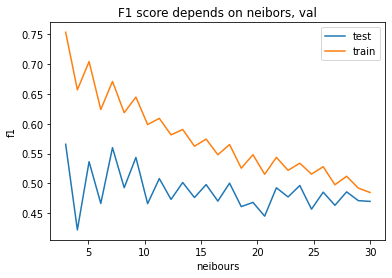

In [109]:
'''
n_n = np.linspace(3, 30, 27)
f1_test_scores = []
f1_train_scores = []
for n_neib in n_n:
        model = KNeighborsClassifier(n_neighbors=int(n_neib), weights='uniform')
        scores = cross_validate(model, x_train, y_train, cv=5, scoring=make_scorer(f1_score), return_train_score=True)
        f1_test_scores.append(scores['test_score'].mean())
        f1_train_scores.append(scores['train_score'].mean())
_d = pd.DataFrame()
_d['n_n'] = n_n
_d['f1'] = f1_test_scores
_d.to_csv('neibours_test.csv')
_d = pd.DataFrame()
_d['n_n'] = n_n
_d['f1'] = f1_train_scores
_d.to_csv('neibours_train.csv')
#'''
_d = pd.read_csv('neibours_test.csv', index_col=0)
n_n = _d['n_n']
f1_test_scores = _d['f1']
_d = pd.read_csv('neibours_train.csv', index_col=0)
f1_train_scores = _d['f1']

plt.plot(n_n, f1_test_scores, label='test')
plt.plot(n_n, f1_train_scores, label='train')
plt.xlabel('neibours')
plt.ylabel('f1')
plt.title('F1 score depends on neibors, val')
plt.legend()
plt.show()

Окей, много соседей нам не нужно, а что если тоже самое но с другими весами

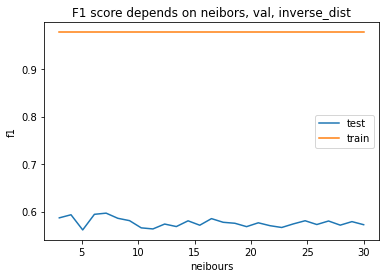

In [110]:
'''
n_n = np.linspace(3, 30, 27)
f1_test_scores = []
f1_train_scores = []
for n_neib in n_n:
        model = KNeighborsClassifier(n_neighbors=int(n_neib), weights='distance')
        scores = cross_validate(model, x_train, y_train, cv=5, scoring=make_scorer(f1_score), return_train_score=True)
        f1_test_scores.append(scores['test_score'].mean())
        f1_train_scores.append(scores['train_score'].mean())
_d = pd.DataFrame()
_d['n_n'] = n_n
_d['f1'] = f1_test_scores
_d.to_csv('inverse_dist_neibours_test.csv')
_d = pd.DataFrame()
_d['n_n'] = n_n
_d['f1'] = f1_train_scores
_d.to_csv('inverse_dist_neibours_train.csv')
'''
_d = pd.read_csv('inverse_dist_neibours_test.csv', index_col=0)
n_n = _d['n_n']
f1_test_scores = _d['f1']
_d = pd.read_csv('inverse_dist_neibours_train.csv', index_col=0)
f1_train_scores = _d['f1']

plt.plot(n_n, f1_test_scores, label='test')
plt.plot(n_n, f1_train_scores, label='train')
plt.xlabel('neibours')
plt.ylabel('f1')
plt.title('F1 score depends on neibors, val, inverse_dist')
plt.legend()
plt.show()

Намного лучше! Так, глянем каие ещё там есть параметры

Ну можно попробовать l1 меру, помотри что да как

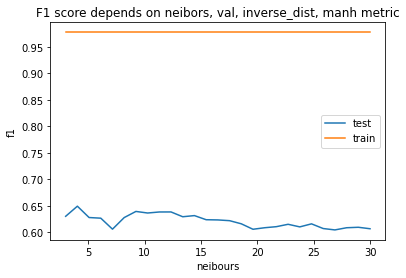

In [124]:
'''
n_n = np.linspace(3, 30, 27)
f1_test_scores = []
f1_train_scores = []
for n_neib in n_n:
        model = KNeighborsClassifier(n_neighbors=int(n_neib), weights='distance', metric='manhattan')
        scores = cross_validate(model, x_train, y_train, cv=5, scoring=make_scorer(f1_score), return_train_score=True)
        f1_test_scores.append(scores['test_score'].mean())
        f1_train_scores.append(scores['train_score'].mean())
_d = pd.DataFrame()
_d['n_n'] = n_n
_d['f1'] = f1_test_scores
_d.to_csv('manh_dist_neibours_test.csv')
_d = pd.DataFrame()
_d['n_n'] = n_n
_d['f1'] = f1_train_scores
_d.to_csv('manh_dist_neibours_train.csv')
'''
_d = pd.read_csv('manh_dist_neibours_test.csv', index_col=0)
n_n = _d['n_n']
f1_test_scores = _d['f1']
_d = pd.read_csv('manh_dist_neibours_train.csv', index_col=0)
f1_train_scores = _d['f1']

plt.plot(n_n, f1_test_scores, label='test')
plt.plot(n_n, f1_train_scores, label='train')
plt.xlabel('neibours')
plt.ylabel('f1')
plt.title('F1 score depends on neibors, val, inverse_dist, manh metric')
plt.legend()
plt.show()

In [125]:
def a_pow_k(x: np.array, alpha=1.05):
    for i in range(x.shape[0]):
        l = list(x[i])
        l_out = l
        for item_pos in range(len(l)):
            l_out[item_pos] = l.index(l[item_pos])
        for item_pos in range(len(l)):
            l_out[item_pos] = alpha ** l_out[item_pos]
        x[i] = np.array(l_out)
    return x
    

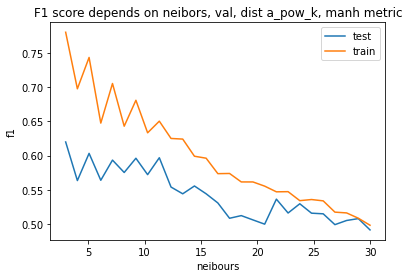

In [126]:
'''
n_n = np.linspace(3, 30, 27)
f1_test_scores = []
f1_train_scores = []
for n_neib in n_n:
        model = KNeighborsClassifier(n_neighbors=int(n_neib), weights=a_pow_k, metric='manhattan')
        scores = cross_validate(model, x_train, y_train, cv=5, scoring=make_scorer(f1_score), return_train_score=True)
        f1_test_scores.append(scores['test_score'].mean())
        f1_train_scores.append(scores['train_score'].mean())
_d = pd.DataFrame()
_d['n_n'] = n_n
_d['f1'] = f1_test_scores
_d.to_csv('manh_dist_neibours_test_a_pow_k.csv')
_d = pd.DataFrame()
_d['n_n'] = n_n
_d['f1'] = f1_train_scores
_d.to_csv('manh_dist_neibours_train_a_pow_k.csv')
'''
_d = pd.read_csv('manh_dist_neibours_test_a_pow_k.csv', index_col=0)
n_n = _d['n_n']
f1_test_scores = _d['f1']
_d = pd.read_csv('manh_dist_neibours_train_a_pow_k.csv', index_col=0)
f1_train_scores = _d['f1']

plt.plot(n_n, f1_test_scores, label='test')
plt.plot(n_n, f1_train_scores, label='train')
plt.xlabel('neibours')
plt.ylabel('f1')
plt.title('F1 score depends on neibors, val, dist a_pow_k, manh metric')
plt.legend()
plt.show()

Ну не получается ничего лучше деревьев, ну и ладно...